# Polynominal Regression Problems
Cho hàm số: `y = ax^n + bx^n-1 + .... + k`. Chúng ta sẽ xây dựng model để giải quyết bài toán này dựa trên cơ sở của bài toán linear regression



In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random

## Dataset

In [122]:
np.random.seed(42)
n_samples = 1000
x = np.linspace(0,10, n_samples).reshape(n_samples,1)
# y = ax^2+ bx + c
theta = np.random.randn(3,1)
y = theta[0] * x**2 + theta[1]*x + theta[2]


Text(0, 0.5, 'y')

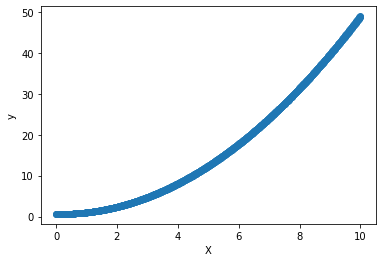

In [123]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('y')

# Modeling

In [124]:
# Create matrix X and theta

X= np.hstack((x**2, x, np.ones(x.shape)))

theta = np.random.randn(3,1)


In [125]:
def model(X,theta):
    return X.dot(theta)


Text(0, 0.5, 'y')

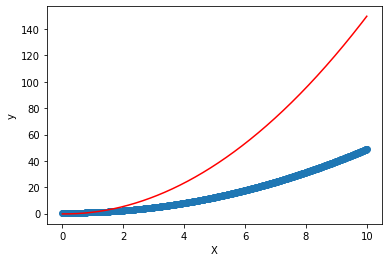

In [126]:
plt.plot(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x, model(X,theta), 'r')
plt.xlabel('X')
plt.ylabel('y')

In [127]:
def cost_func(X,y, theta):
    m = X.shape[0]
    return (1/(2*m))* np.sum((model(X,theta) -y)**2)
    
cost_func(X,y,theta)

1001.0600294458623

In [128]:
def gradient(X,y,theta):
    m = X.shape[0]
    return (1/m)* X.T.dot((model(X,theta) - y))


Text(0, 0.5, 'y')

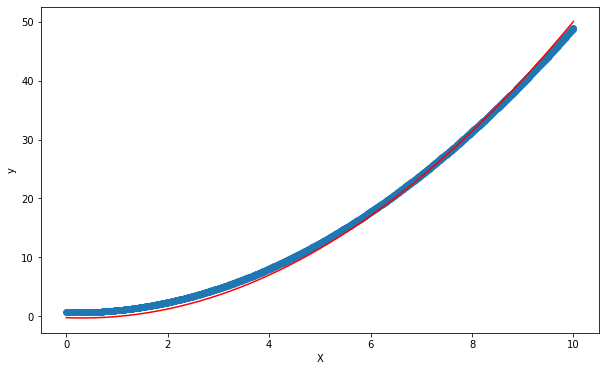

In [138]:
def gradient_descent(X,y,theta, learning_rate, n_interactions):
    err= np.zeros(n_interactions)
    for i in range(0,n_interactions):
        theta = theta - learning_rate * gradient(X,y,theta)
        err[i] = cost_func(X,y,theta)
    return theta, err

learning_rate = 0.00001
n_interactions = 1500

theta_final,err = gradient_descent(X, y, theta, learning_rate,n_interactions)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,model(X,theta_final), c='r')
plt.xlabel("X")
plt.ylabel("y")

Text(0, 0.5, 'Cost function')

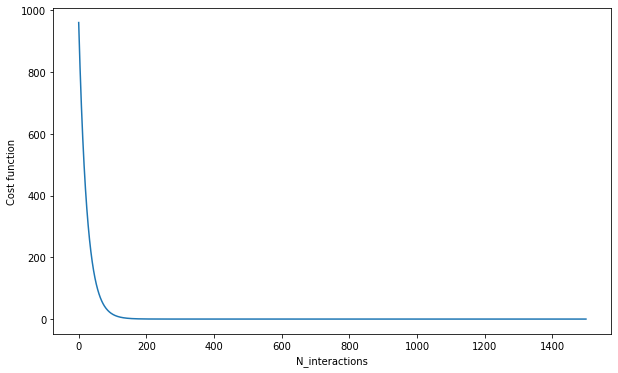

In [139]:
# Biểu diễn sai số theo số lần thực hiện thuật toán
plt.figure(figsize=(10,6))
plt.plot(np.arange(n_interactions), err)
plt.xlabel('N_interactions')
plt.ylabel('Cost function')